In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from TrinomialModel import TrinomialOption as TO
from BinomialModel import BinomialOption as BO

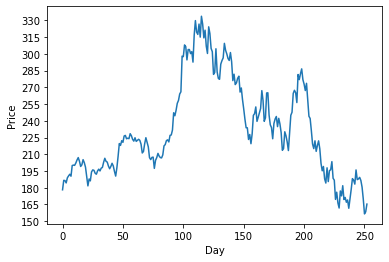

In [2]:
data=pd.read_csv("HistoricalData_NVIDIA.csv",parse_dates=["Date"])
data=data.reindex(index=data.index[::-1])
data["Close"]=data["Close/Last"].str[1:].astype("float")
data=pd.DataFrame(data["Close"].values.tolist())
x=np.log(data/data.shift(1))[1:]
data.plot(xlabel="Day",ylabel="Price",legend=False,yticks=range(150,331,15))
mu=x.mean()
dt=1/252
s=np.var(x)/dt
r=mu+s/2
s=s**0.5

## Parameters

In [3]:
data.tail(20)
S=data[0].iloc[-1]
print(S)
strike=170

165.27


In [4]:
option=BO(S,strike, r=r, T=132/252, N=5,sigma=s, mu=0, is_call=False, is_am=True)
print("Option price = "+str(option.price(True,True)))
print(option.d)

      0           1           2           3           4           5
                                                         416.249994
                                             346.036729  287.667073
                                 287.667073  239.143242  198.804436
                     239.143242  198.804436      165.27   137.39217
         198.804436      165.27   137.39217  114.216788   94.950641
 165.27   137.39217  114.216788   94.950641   78.934317   65.619636

         0          1          2          3          4           5
                                                               0.0
                                                   0.0         0.0
                                        0.0        0.0         0.0
                        3.868786   7.873305   16.02284    32.60783
            12.325651  21.212194  35.289683  55.783212   75.049359
 24.655435  37.841447  55.783212  75.049359  91.065683  104.380364

Option price = 24.65543522013766
0.8313194801169834


In [5]:
option=TO(S,strike, r=r, T=132/252, N=5,sigma=s, mu=0, is_call=False, is_am=True)
print("Option price = "+str(option.price(True,True)))
option.print_deltas()
option.print_gammas()
option.d

      0           1           2           3           4           5
                                                         454.614227
                                             371.324174  371.324174
                                 303.293725  303.293725  303.293725
                     247.727161  247.727161  247.727161  247.727161
         202.340969  202.340969  202.340969  202.340969  202.340969
 165.27      165.27      165.27      165.27      165.27      165.27
         134.990818  134.990818  134.990818  134.990818  134.990818
                     110.259096  110.259096  110.259096  110.259096
                                  90.058483   90.058483   90.058483
                                              73.558833   73.558833
                                                           60.08209

         0          1          2          3          4          5
                                                              0.0
                                                   

0.8167896027555395

# Comparison with data from NASDAQ

In [6]:
S=data[0].iloc[-1]
strike=165

dates=[2,7,12,32,72,132,252,504]
nasdaq_call=[4.15,2.92,5.06,13.76,19.72,28.11,53.95,53.98]
nasdaq_put=[3.35,10.95,8.10,11.62,18.13,17.15,33.35,37.69]
n=2

bin_call=[BO(S,strike, r=r, T=i/252, N=n,sigma=s, mu=0, is_call=True, is_am=True) for i in dates]
b_call=[i.price(False,False) for i in bin_call]

tr_call=[TO(S,strike, r=r, T=i/252, N=2*n,sigma=s, mu=0, is_call=True, is_am=True) for i in dates]
tr_option_call=[i.price(False,False) for i in tr_call]

bin_put=[BO(S,strike, r=r, T=i/252, N=n,sigma=s, mu=0, is_call=False, is_am=True) for i in dates]
b_put=[i.price(False,False) for i in bin_put]

tr_put=[TO(S,strike, r=r, T=i/252, N=2*n,sigma=s, mu=0, is_call=False, is_am=True) for i in dates]
tr_option_put=[i.price(False,False) for i in tr_put]

results=pd.DataFrame({"Days to expiration date":dates,"Binomial call": b_call,"Trinomial call": tr_option_call,"Real call option":nasdaq_call,
                      "Binomial put": b_put,"Trinomial put": tr_option_put,"Real put option":nasdaq_put})      

In [7]:
results.style.applymap(lambda x:"background-color: #ffff99",subset=['Real call option', 'Real put option'])

In [8]:
tr_delta_call=[i.delta(S) for i in tr_call]
tr_delta_put=[i.delta(S) for i in tr_put]

delta_nasdaq_call=[0.143,0.318,0.359,0.435,0.488,0.532,0.581,0.635]
delta_nasdaq_put=[-0.859,-0.681,-0.64,-0.564,-0.513,-0.471,-0.435,-0.387]
deltas=pd.DataFrame({"Delta, trinomial call":tr_delta_call,"Delta, trinomial put":tr_delta_put,"Real delta,call":delta_nasdaq_call,"Real delta,put":delta_nasdaq_put})

In [9]:
deltas

Delta, trinomial call  Delta, trinomial put  Real delta,call  \
0               0.515608             -0.489669            0.143   
1               0.535854             -0.474423            0.318   
2               0.546376             -0.462934            0.359   
3               0.581095             -0.434894            0.435   
4               0.619518             -0.408263            0.488   
5               0.658814             -0.380085            0.532   
6               0.712216             -0.354383            0.581   
7               0.779013             -0.345304            0.635   

   Real delta,put  
0          -0.859  
1          -0.681  
2          -0.640  
3          -0.564  
4          -0.513  
5          -0.471  
6          -0.435  
7          -0.387

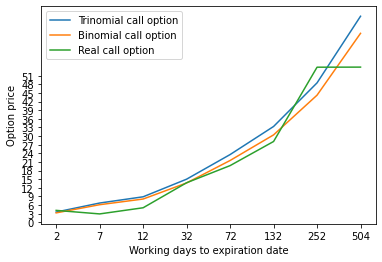

In [10]:
x_axis=list(map(str, results["Days to expiration date"]))
plt.plot(x_axis, results["Trinomial call"],label='Trinomial call option')
plt.plot(x_axis, results["Binomial call"],label='Binomial call option')
plt.plot(x_axis, results["Real call option"],label="Real call option")
plt.legend()
plt.xlabel("Working days to expiration date")
plt.ylabel("Option price")
plt.yticks(np.arange(0, max(nasdaq_call), 3))
plt.show()

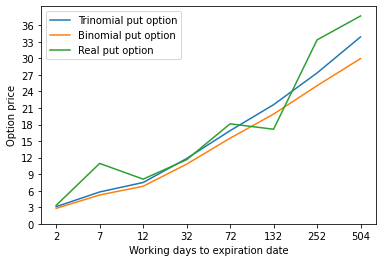

In [11]:
plt.plot(x_axis, results["Trinomial put"],label='Trinomial put option')
plt.plot(x_axis, results["Binomial put"],label='Binomial put option')
plt.plot(x_axis, results["Real put option"],label="Real put option")
plt.legend()
plt.xlabel("Working days to expiration date")
plt.ylabel("Option price")
plt.yticks(np.arange(0, max(nasdaq_put), 3))
plt.show()

In [12]:
errors_res=pd.DataFrame()
errors_res["Error,binomial call"]=abs(results["Binomial call"]-results["Real call option"])/results["Real call option"]
errors_res["Error,binomial put"]=abs(results["Binomial put"]-results["Real put option"])/results["Real put option"]
errors_res["Error,trinomial call"]=abs(results["Trinomial call"]-results["Real call option"])/results["Real call option"]
errors_res["Error,trinomial put"]=abs(results["Trinomial put"]-results["Real put option"])/results["Real put option"]
errors_res

Error,binomial call  Error,binomial put  Error,trinomial call  \
0             0.209957            0.165404              0.139362   
1             1.097300            0.522460              1.296586   
2             0.600262            0.159839              0.753792   
3             0.005059            0.068763              0.090613   
4             0.090256            0.143676              0.194843   
5             0.081703            0.159990              0.185790   
6             0.180262            0.249022              0.100963   
7             0.217645            0.204928              0.327770   

   Error,trinomial put  
0             0.073947  
1             0.472790  
2             0.075353  
3             0.018306  
4             0.068555  
5             0.259506  
6             0.179783  
7             0.100717

In [13]:
errors_res.mean()

Error,binomial call     0.310306
Error,binomial put      0.209260
Error,trinomial call    0.386215
Error,trinomial put     0.156119
dtype: float64

In [14]:
opt_type=["Binomial call","Binomial put","Trinomial call","Trinomial put"]
rmse=[]
rmse.append((sum((results["Binomial call"]-results["Real call option"])**2)/len(results["Binomial call"]))**0.5)
rmse.append((sum((results["Binomial put"]-results["Real put option"])**2)/len(results["Binomial put"]))**0.5)
rmse.append((sum((results["Trinomial call"]-results["Real call option"])**2)/len(results["Trinomial call"]))**0.5)
rmse.append((sum((results["Trinomial put"]-results["Real put option"])**2)/len(results["Trinomial put"]))**0.5)
rmse=pd.DataFrame({"Option type": opt_type, "RMSE": rmse})
rmse

Option type      RMSE
0   Binomial call  5.715150
1    Binomial put  4.720852
2  Trinomial call  7.206956
3   Trinomial put  3.517665

In [15]:
errors_res.describe()

Error,binomial call  Error,binomial put  Error,trinomial call  \
count             8.000000            8.000000              8.000000   
mean              0.310306            0.209260              0.386215   
std               0.365056            0.136553              0.426578   
min               0.005059            0.068763              0.090613   
25%               0.088118            0.155798              0.129762   
50%               0.195110            0.162697              0.190316   
75%               0.313299            0.215951              0.434275   
max               1.097300            0.522460              1.296586   

       Error,trinomial put  
count             8.000000  
mean              0.156119  
std               0.148581  
min               0.018306  
25%               0.072599  
50%               0.088035  
75%               0.199713  
max               0.472790

In [16]:
S_list=data[0].values[::5]
dt=1/252
mu=x.mean()
s=np.var(x)
sigma=s/dt
r=mu+sigma*sigma/2
option=TO(S,180, r=r, T=7/252, N=3,sigma=s, mu=0, is_call=False, is_am=True,lmbd=1)
res_heg=option.delta_hedging(20,S_list,160, r, 0.3846, 1,sigma, is_call=True, is_am=True)#.iloc[:12,:]
print(res_heg["Shares"].agg([(lambda col : col[col < 0].sum()),
                         (lambda col : col[col > 0].sum())
                         ]))
res_heg.style.format('{:.4f}') 

<lambda>    -28.40315
<lambda>    128.40315
Name: Shares, dtype: float64
